## 习题 2.4

In [1]:
data <- read.table("./ex_2_4.txt", header=TRUE)
data

Y,X1,X2
<int>,<int>,<int>
162,274,2450
120,180,3254
223,375,3802
131,205,2838
67,86,2347
169,265,3782
81,98,3008
192,330,2450
116,195,2137


In [2]:
attach(data)

回归之前应该先看一下变量之间的相关关系如何，可以借助*散点图矩阵*来实现。

散点图矩阵（scatterplot matrix): 每个行与列的交叉点所在的散点图表示其所在的行与列的两个变量的相关关系：

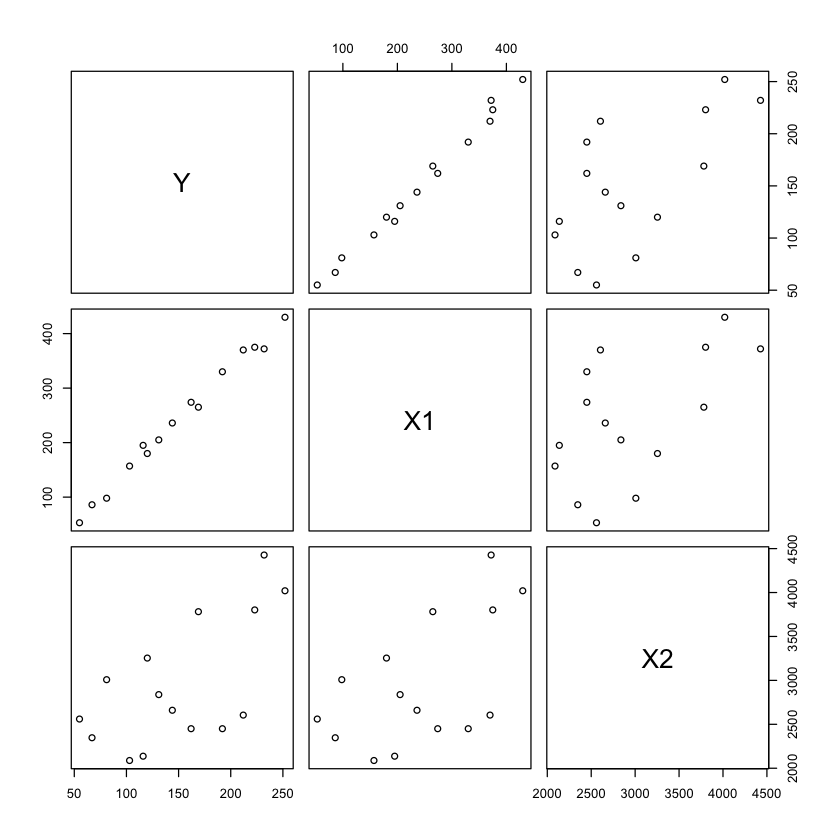

In [3]:
pairs(data)

用 psych 包里的 `pairs.panels` 可以作出有更多信息的图：

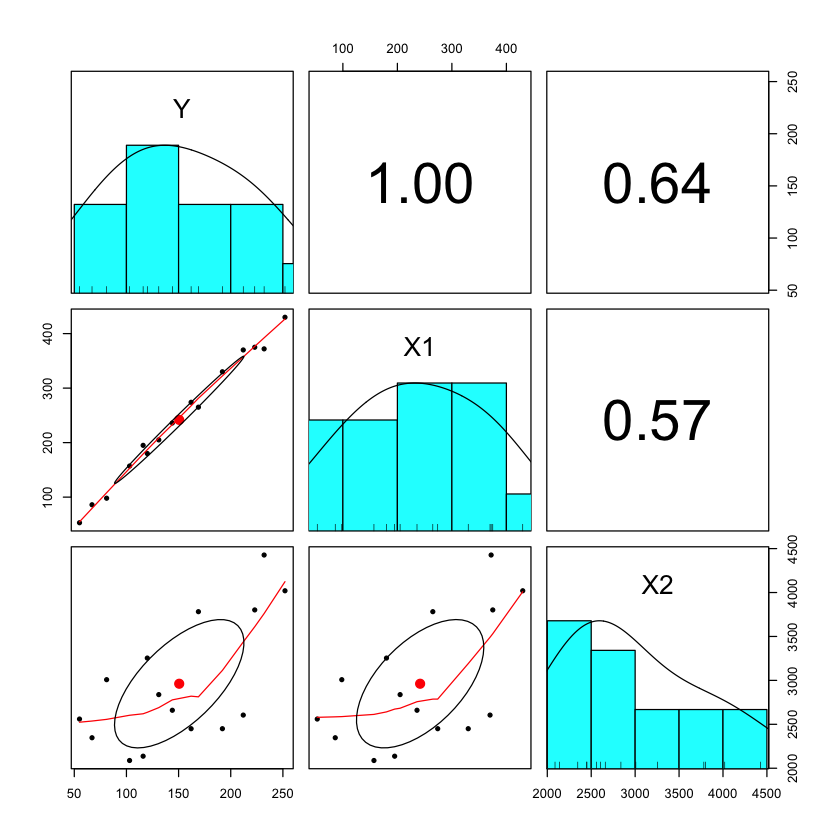

In [4]:
library(psych)
pairs.panels(data)

- 对角线上方：相关系数
- 对角线：每个特征的数值分布直方图
- 下方：散点图
    - 相关椭圆：
        - 中心点：两个变量的均值所确定的点
        - 椭圆形状：两个变量的相关性：椭圆越被拉伸，其相关性越强
    - 局部回归平滑曲线：x轴和y轴变量之间的一般关系

假设 $Y$ 与 $X_1$, $X_2$ 之间满足线性回归关系

$$
y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i,\quad i=1,2,\cdots,15
$$

其中 $\epsilon_i (i=1,1,\cdots,15)$ 独立同分布于 $N(0,\sigma^2)$.

#### （1）
求回归系数 $\beta_0,\beta_1,\beta_2$ 的最小二乘估计和误差方差 $\sigma^2$ 的估计，
写出回归方程并对回归系数作解释

回归：

In [5]:
fm <- lm(Y ~ X1 + X2, data)
summary(fm)


Call:
lm(formula = Y ~ X1 + X2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8320 -1.2044 -0.2406  1.4888  3.3092 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.4526128  2.4306505   1.420    0.181    
X1          0.4960050  0.0060544  81.924  < 2e-16 ***
X2          0.0091991  0.0009681   9.502  6.2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.177 on 12 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9988 
F-statistic:  5679 on 2 and 12 DF,  p-value: < 2.2e-16


Coefficients 是回归得到的系数，由此得到回归方程：

$$
\hat Y = 0.496005 X_1 + 0.009199 X_2 + 3.452613
$$

Residual standard error 即残差标准差，$\sigma=2.177$, 由此得到误差方差的估计：

$$
\sigma^2=4.739
$$

#### (2) 
求出方差分析表，解释对现行回归关系显著性检验的结果。求复相关系数的平方 $R^2$ 的值并解释其意义

模型方差分析表:

In [6]:
anova(fm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,53416.71863,53416.718634,11268.64354,3.270351e-19
X2,1,427.99780,427.997800,90.28923,6.201181e-07
Residuals,12,56.88357,4.740297,NA,NA


aov 输出更友好，可以直接显示出结果：

In [7]:
summary(aov(fm))

            Df Sum Sq Mean Sq  F value  Pr(>F)    
X1           1  53417   53417 11268.64 < 2e-16 ***
X2           1    428     428    90.29 6.2e-07 ***
Residuals   12     57       5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$R^2$ 可以由 summary(fm) 输出的 `Multiple R-squared` 看出：

In [8]:
summary(fm)$r.squared

[1] 0.9989447

$\therefore R^2=0.9989$ 

#### (3)
分别求 $\beta_1$ 和 $\beta_2$ 的置信度为 $95\%$ 的置信区间

In [9]:
# 模型参数的置信区间
confint(fm, level = 0.95)

,2.5 %,97.5 %
(Intercept),-1.843319690,8.74854527
X1,0.482813482,0.50919647
X2,0.007089742,0.01130842


得到所求置信区间：

$$
\begin{aligned}
\beta_1:&& (0.482813482, 0.50919647)\\
\beta_2:&& (0.007089742, 0.01130842)
\end{aligned}
$$

#### (4)
对 $\alpha=0.05$，分别检验人数 $X_1$ 和收入 $X_2$ 对销量 $Y$ 的影响是否显著，
利用回归系数有关的一般假设检验方法检验 $X_1$ 和 $X_2$ 的交互作用 ($X_1X_2$) 对 $Y$ 的影响是否显著。

在 `summary(fm)` 输出的 Coefficients 段即可看出 $X_1$、$X_2$ 对 $Y$ 影响的显著性：

In [10]:
summary(fm)#$coefficients


Call:
lm(formula = Y ~ X1 + X2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8320 -1.2044 -0.2406  1.4888  3.3092 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.4526128  2.4306505   1.420    0.181    
X1          0.4960050  0.0060544  81.924  < 2e-16 ***
X2          0.0091991  0.0009681   9.502  6.2e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.177 on 12 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9988 
F-statistic:  5679 on 2 and 12 DF,  p-value: < 2.2e-16


Coefficients 段输出有:

- `t value`: T 检验的值
- `Pr(>|t|)`: 表示 T 检验判定 P 值，后面有显著性标记（`*`号）
- 显著性标记：`*` 个数对应显著性水平。

这里 $X_1$、$X_2$ 都是有 `***` 的，或者看 P 都在 0.0001 以下，
所以对于 $\alpha=0.05$，认为人数 $X_1$ 和收入 $X_2$ 对销量 $Y$ 的影响显著。

注：这里可以做约简模型，求$SSE(R)$、$SSE(T)$... 去分析，下面的函数会有帮助：（由于麻烦，这里不采用这种方法。）

In [11]:
sse <- function(model, y) sum((fitted(model) - y)^2)
ssr <- function(model, y) sum((fitted(model) - mean(y))^2)
sst <- function(model, y) ssr(model, y) + sse(model, y)

ss <- function(model, y) {
    cbind(matrix(c("sse", "ssr", "sst"), 3, 1), 
          c(sse(model, y), ssr(model, y), sst(model, y)))
    }

# R^2
# ssr(fm, Y)/sst(fm, Y)

下面研究 $X_1$、$X_2$ 交互作用对 Y 的影响：

In [12]:
fm1 <- update(fm, . ~ . + X1:X2)
summary(fm1)


Call:
lm(formula = Y ~ X1 + X2 + X1:X2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9094 -1.2010 -0.1811  1.5072  3.2141 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.901e+00  8.539e+00   0.574    0.578    
X1          4.911e-01  2.832e-02  17.344 2.45e-09 ***
X2          8.674e-03  3.124e-03   2.777    0.018 *  
X1:X2       1.698e-06  9.556e-06   0.178    0.862    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.271 on 11 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9987 
F-statistic:  3481 on 3 and 11 DF,  p-value: < 2.2e-16


从拟合的结果里，`X1:X2` 的 P-value=0.862 比较大，说明交互作用对 Y 的影响不显著，没有必要引入交叉项。

#### （5）
![](https://tva1.sinaimg.cn/large/008i3skNly1gr3yf8l5dzj30mh01taai.jpg)

新数据：

In [13]:
x01 = 220
x02 = 2500
newdata <- data.frame(X1 = c(x01), X2 = c(x02))
newdata

X1,X2
<dbl>,<dbl>
220,2500


代入模型进行预测：

In [14]:
predict(fm, newdata)

1 
135.5714

要获取置信区间需要再传入几个参数：

In [15]:
predict(fm, newdata, interval="prediction", levels=0.95)

,fit,lwr,upr
1,135.5714,130.5998,140.543


即得到预测值 $\hat y_0 = 135.5714$，置信度为 $95\%$ 的置信区间 $(130.5998, 140.543)$。

#### （6）

![](https://tva1.sinaimg.cn/large/008i3skNly1gr3yz2huq0j30mm02naax.jpg)

：

In [16]:
# 拟合值：
fm.fitted <- fitted(fm)
# 残差：
fm.residuals <- residuals(fm)
# 学生化残差：
fm.rstudent <- rstudent(fm)

fmr <- data.frame(
    `拟合值`=fm.fitted, 
    `残差`=fm.residuals, 
    `学生化残差`=fm.rstudent
); fmr

,拟合值,残差,学生化残差
,<dbl>,<dbl>,<dbl>
1,161.89572,0.1042756,0.04973473
2,122.66732,-2.6673176,-1.36670170
3,224.42938,-1.4293843,-0.71265041
4,131.24062,-0.2406244,-0.11000544
5,67.69928,-0.6992835,-0.34443368
6,169.68486,-0.6848553,-0.33365032
7,79.73194,1.2680643,0.65018013
8,189.67200,2.3279970,1.25776219
9,119.83202,-3.8320189,-2.21655274


对于学生化残差用频率检验法：

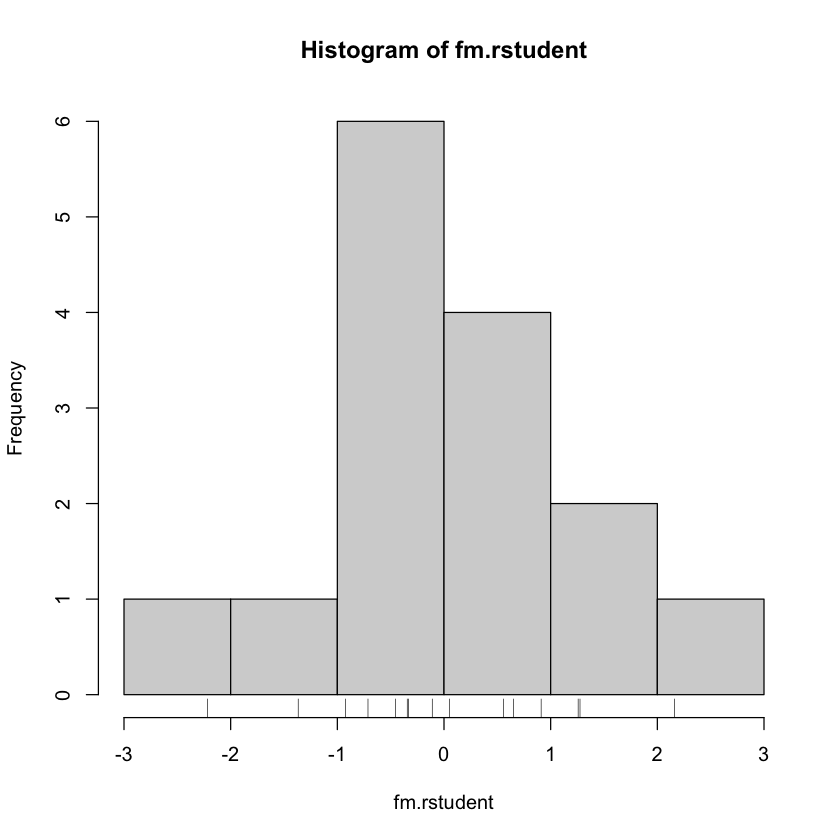

In [17]:
hist(fm.rstudent)
rug(fm.rstudent)

- 有 $\frac{10}{15}\approx 0.68$ 落在 $(-1.0,1.0)$ 内，
- 有 $\frac{13}{15}\approx 0.87$ 落在 $(-1.5,1.5)$ 内，
- 有 $\frac{15}{15}      = 1.00$ 落在 $(-2.4,2.4)$ 内，

可见，学生化残差与上述个区间的频率在 $N(0,1)$ 分布的相应概率相差不大，所以模型误差项的正态性假设是合理的。

进一步，可以做一个 ks 检测：

In [18]:
ks.test(fm.rstudent, "pnorm", 0, 1)


	One-sample Kolmogorov-Smirnov test

data:  fm.rstudent
D = 0.11208, p-value = 0.9808
alternative hypothesis: two-sided


检测结果也说明正态分布。

下面作出各种残差图：

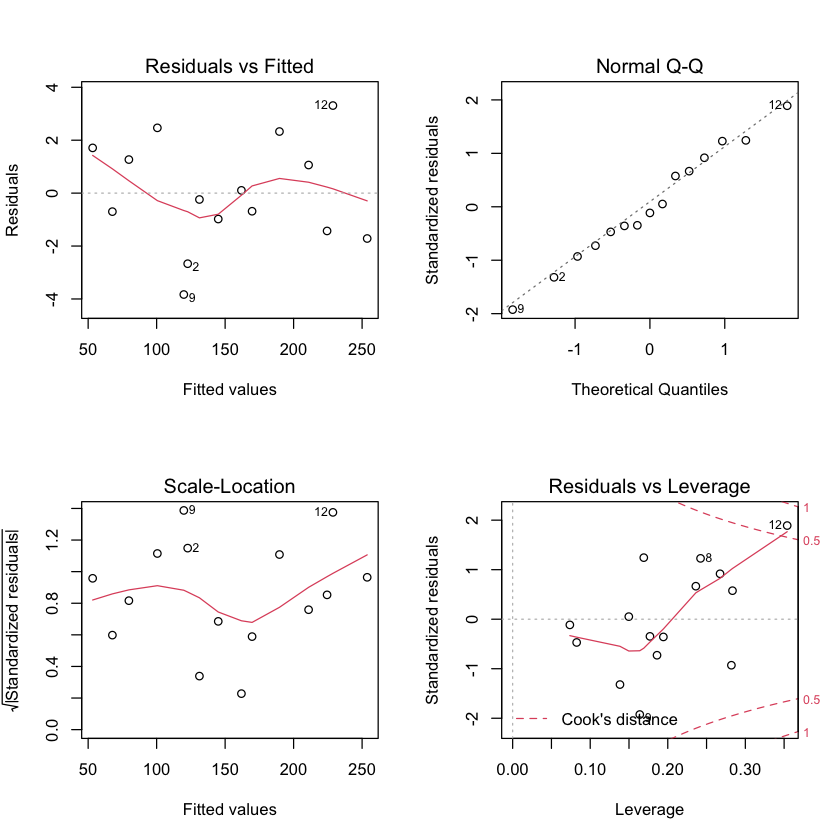

In [19]:
par(mfrow=c(2,2))

plot(fm)

- 左上图：**残差-拟合**：残差和拟合值之间，数据点均匀分布在y=0两侧，呈现出随机的分布，没有明显的形状特征，说明残差数据表现比较好。
- 右上图：**标准化残差 Q-Q**：数据点按对角直线排列，趋于一条直线，并被对角直接穿过，直观上符合正态分布。
- 左下图：**标准化残差-拟合**：数据随机分布与左上图蕾丝，无明显的形状特征。
- 右下图：**标准化残差杠杆图**：可以看出离群点、高杠杆值点和强影响点。（这里不做讨论）

由这些图，可以认为相应的线性回归模型以及误差的独立正态分布的假设是合理的。

In [20]:
detach(data)